In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Load the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Explore the data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

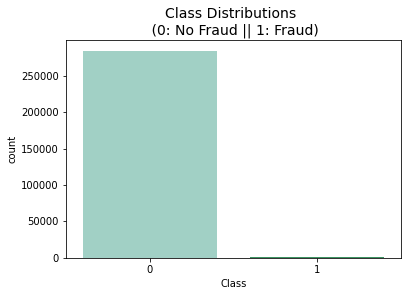

In [5]:
#x=sns.countplot(df['Class'])

colors = ["#99d8c9", "#2ca25f"]
sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



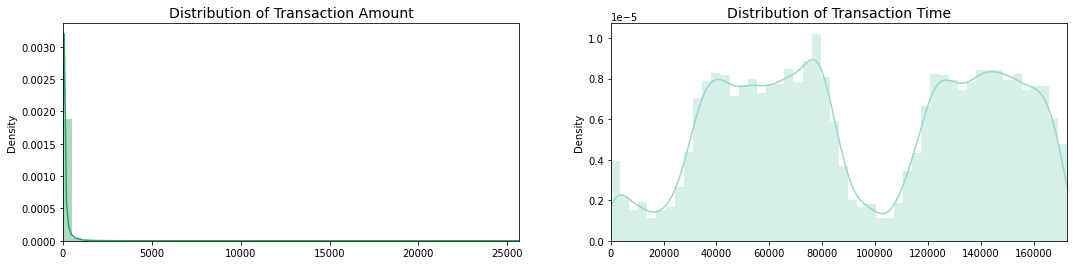

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='#2ca25f')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='#99d8c9')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [7]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]
hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

Credit Card Transactions Time Density Plot reflects the distribution of 'Not Fraud' and 'Fraud' transactions over a continuous interval or time period.

Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time.

Therefore,***Time*** feature **can't** tell whether the trasaction is Fraudulent transactions or not.

# Correlation of features

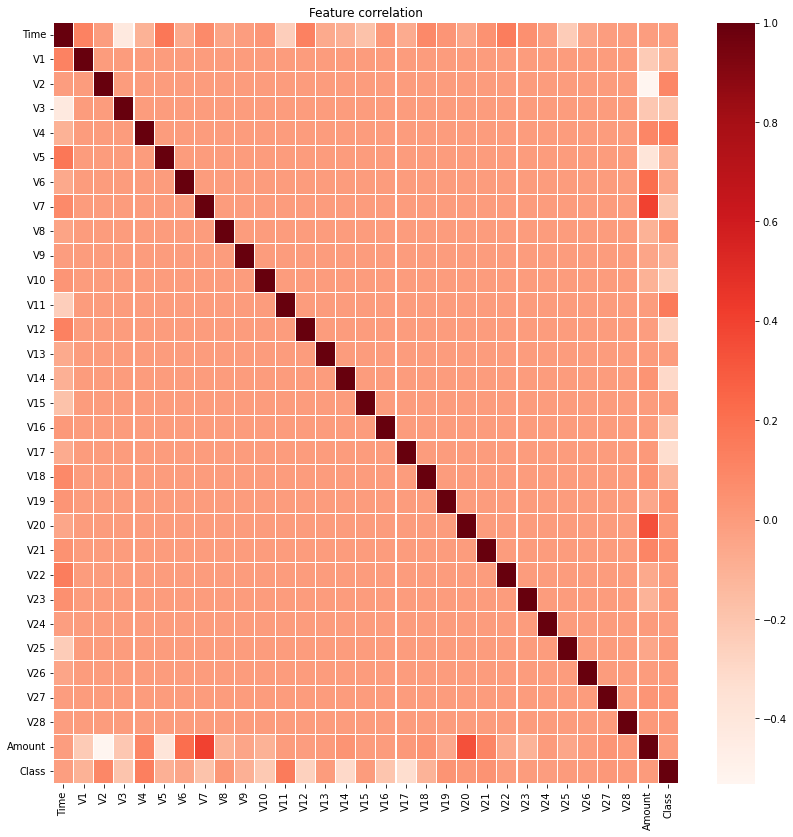

In [8]:
plt.figure(figsize = (14,14))
plt.title('Feature correlation')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

# Scaling the values


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
sk=StandardScaler()
rs=RobustScaler()
df['Time']=sk.fit_transform(df['Time'].values.reshape(-1,1))
df['Amount']=rs.fit_transform(df['Amount'].values.reshape(-1,1))

# The values in the target  variables are imbalanced hence we need to balance the values taking equal sample from **FRAUD** and **NON-FRAUD**



In [10]:

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
131157,-0.322246,-0.474602,2.739625,-2.014620,1.429834,0.661994,-2.225870,1.184110,-0.530799,0.741093,0.835913,1.602183,0.059054,0.753460,-4.335847,1.045420,0.421543,2.801453,1.087372,-0.798040,0.995967,-0.328488,-0.084107,0.185802,0.575044,-0.208607,-0.438595,0.727906,0.169993,-0.296374,0
163586,0.447547,0.949241,1.333519,-4.855402,1.835006,-1.053245,-2.562826,-2.286986,0.260906,-0.895366,-4.542612,2.453710,-4.925199,-1.200412,-6.424372,1.014897,-3.129421,-5.147039,-1.815437,0.520497,0.424608,0.306598,-0.854627,0.101177,-0.281497,0.024444,-0.107944,0.625289,0.315677,0.600852,1
216383,0.961002,1.853892,-1.342853,0.856435,0.971987,-1.648345,1.439212,-1.944185,0.562875,1.002172,0.758315,-0.305017,1.480760,0.703800,-1.334718,-2.476111,-1.539914,-0.078498,1.977849,-0.637361,-0.545517,-0.170884,0.449283,0.197544,0.763012,-0.248061,-0.533418,0.150104,-0.008857,0.251520,0
6336,-1.837743,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,-5.134454,4.560720,-8.873748,-0.797484,-9.177166,-0.257025,-0.871688,1.313014,0.773914,-2.370599,0.269773,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,-0.293440,1
18809,-1.369373,0.923764,0.344048,-2.880004,1.721680,-3.019565,-0.639736,-3.801325,1.299096,0.864065,-2.895252,3.028162,-2.549177,-1.560432,-2.971317,1.078895,-4.702012,-4.908099,-1.508873,3.001685,0.170872,0.899931,1.481271,0.725266,0.176960,-1.815638,-0.536517,0.489035,-0.049729,0.115978,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

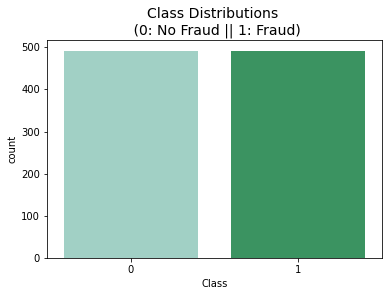

In [11]:
#x=sns.countplot(new_df['Class'])

colors = ["#99d8c9", "#2ca25f"]
sns.countplot('Class', data=new_df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [12]:
X=new_df.iloc[:,:-1].values
X.shape

(984, 30)

In [13]:
Y=new_df.iloc[:,-1].values
Y.shape

(984,)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# SVM
SUPPORT VECTOR MACHINE LINEAR KERNEL

In [15]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)
pred_svc =svc.predict(x_test)

In [16]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred_svc))

Accuracy: 0.9191919191919192


In [17]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        39
           1       0.98      0.88      0.93        60

    accuracy                           0.92        99
   macro avg       0.91      0.93      0.92        99
weighted avg       0.93      0.92      0.92        99



In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_svc)

array([[38,  1],
       [ 7, 53]])

In [19]:
print("Precision:",metrics.precision_score(y_test, pred_svc))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, pred_svc))

Precision: 0.9814814814814815
Recall: 0.8833333333333333


#KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)

In [21]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred_knn))

Accuracy: 0.9090909090909091


In [22]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        39
           1       0.98      0.87      0.92        60

    accuracy                           0.91        99
   macro avg       0.90      0.92      0.91        99
weighted avg       0.92      0.91      0.91        99



In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_knn)

array([[38,  1],
       [ 8, 52]])

In [24]:
print("Precision:",metrics.precision_score(y_test, pred_knn))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, pred_knn))

Precision: 0.9811320754716981
Recall: 0.8666666666666667


# Naive Bayes

In [25]:
from sklearn import naive_bayes
NB = naive_bayes.GaussianNB()
NB.fit(x_train,y_train)
pred_nb=NB.predict(x_test)

In [26]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred_nb))

Accuracy: 0.8686868686868687


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_nb)

array([[39,  0],
       [13, 47]])

In [28]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred_nb))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        39
           1       1.00      0.78      0.88        60

    accuracy                           0.87        99
   macro avg       0.88      0.89      0.87        99
weighted avg       0.90      0.87      0.87        99



In [29]:
print("Precision:",metrics.precision_score(y_test, pred_nb))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, pred_nb))

Precision: 1.0
Recall: 0.7833333333333333


# RANDOM FOREST

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [31]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred_rfc))

Accuracy: 0.9494949494949495


In [32]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred_rfc))

Accuracy: 0.9494949494949495


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_rfc)

array([[39,  0],
       [ 5, 55]])

In [34]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        39
           1       1.00      0.92      0.96        60

    accuracy                           0.95        99
   macro avg       0.94      0.96      0.95        99
weighted avg       0.96      0.95      0.95        99



In [35]:
print("Precision:",metrics.precision_score(y_test, pred_rfc))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, pred_rfc))

Precision: 1.0
Recall: 0.9166666666666666


# XG BOOST

In [36]:
# fit model no training data
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [37]:
# make predictions for test data
y_predxg = model.predict(x_test)

In [38]:
accuracy = accuracy_score(y_test, y_predxg)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.94%


# Neural Networ

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size = 0.10,random_state=42)

In [40]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.activations import relu,softmax
from keras.regularizers import l2

In [41]:
model = Sequential()
model.add(Dense(16, input_dim=30,kernel_regularizer=l2(0.01), activation='relu'))
model.add(Dense(32, kernel_regularizer=l2(0.01),activation='relu'))
model.add(Dense(48, kernel_regularizer=l2(0.01),activation='relu'))
# model.add(Dense(64, kernel_regularizer=l2(0.01),activation='relu',))
# model.add(Dense(128, kernel_regularizer=l2(0.01),activation='relu',))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
from keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath='Convolutional.hdf5',verbose=1,save_best_only=True)
history = model.fit(x_train, y_train, epochs=50, batch_size=16,validation_data=(x_val,y_val))

Epoch 1/50
50/50 [==============================] - 1s 6ms/step - loss: 1.1290 - accuracy: 0.7538 - val_loss: 0.9488 - val_accuracy: 0.8876
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.8757 - accuracy: 0.9209 - val_loss: 0.7832 - val_accuracy: 0.8989
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.7219 - accuracy: 0.9309 - val_loss: 0.6674 - val_accuracy: 0.8989
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.6136 - accuracy: 0.9397 - val_loss: 0.5854 - val_accuracy: 0.8989
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5347 - accuracy: 0.9485 - val_loss: 0.5224 - val_accuracy: 0.8989
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.9435 - val_loss: 0.4731 - val_accuracy: 0.9101
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.9472 - val_loss: 0.4344 - val_accuracy: 0.9326
Epoch 8/50
50/50 [==

In [44]:
score=model.evaluate(x_test,y_test,verbose=1)               #evaluates the model
accuracy=100*score[1]                                       
print('Test accuracy is %.4f%%' % accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 0.1950 - accuracy: 0.9192
Test accuracy is 91.9192%


In [45]:
score=model.evaluate(x_train,y_train,verbose=1)               #evaluates the model
accuracy=100*score[1]                                       
print('Test accuracy is %.4f%%' % accuracy)

25/25 [==============================] - 0s 1ms/step - loss: 0.1271 - accuracy: 0.9812
Test accuracy is 98.1156%


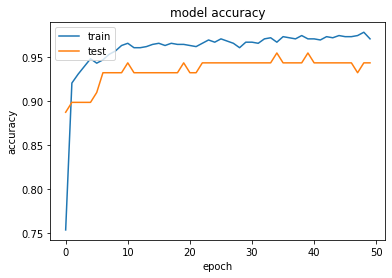

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

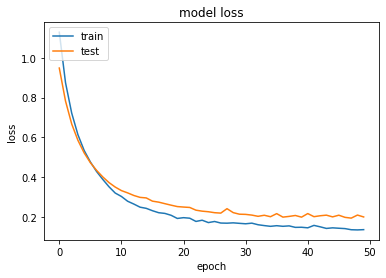

In [47]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Cross validation 

Test Data with Logistic Regression, KNN, SVM, Decision Tree

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [49]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    training_score = cross_val_score(classifier, x_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 95.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score


In [50]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(x_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(x_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(x_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimat

In [51]:
log_reg_score = cross_val_score(log_reg, x_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, x_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, x_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, x_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.97%
Knears Neighbors Cross Validation Score 94.1%
Support Vector Classifier Cross Validation Score 95.6%
DecisionTree Classifier Cross Validation Score 93.22%


# LEARNIG CURVE

In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

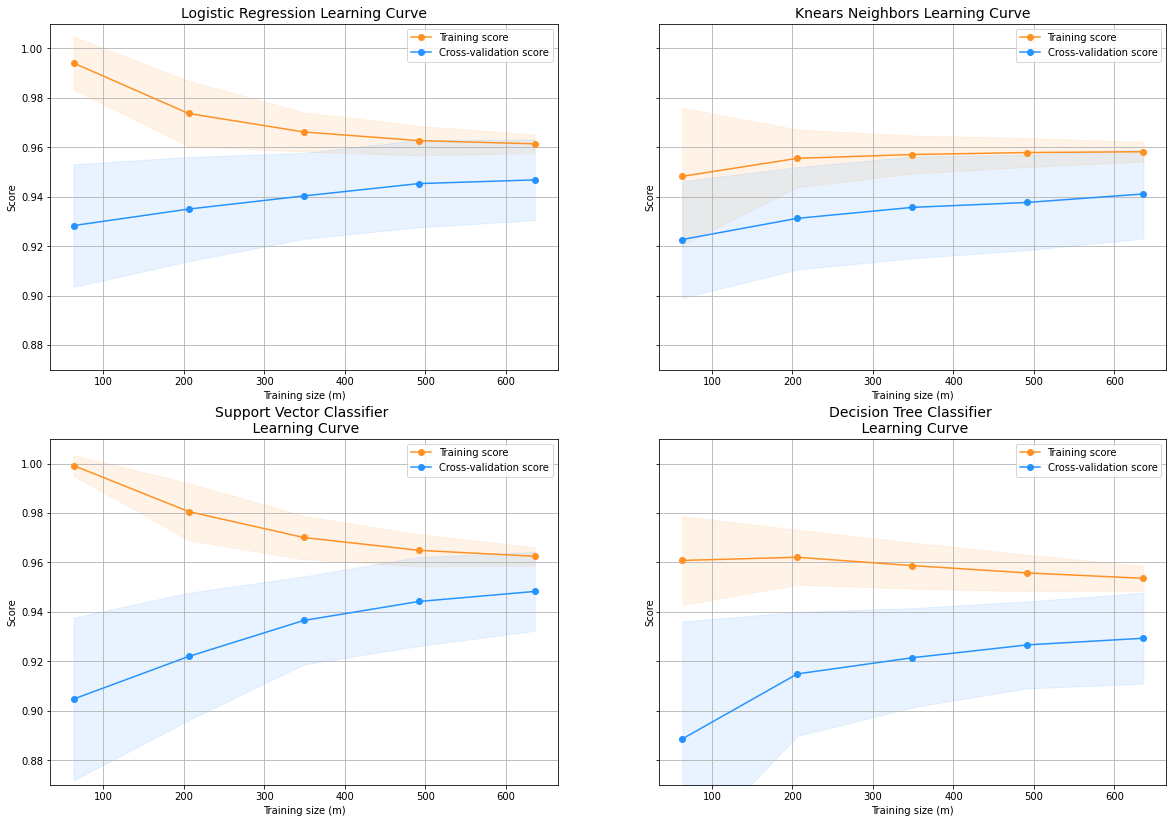

In [53]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, x_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [54]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, x_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, x_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, x_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, x_train, y_train, cv=5)

In [55]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9768642242060108
KNears Neighbors:  0.9399714435536349
Support Vector Classifier:  0.9791702204279676
Decision Tree Classifier:  0.9346644933442


In [56]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

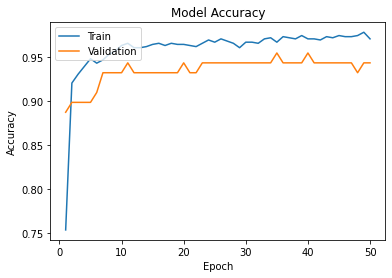

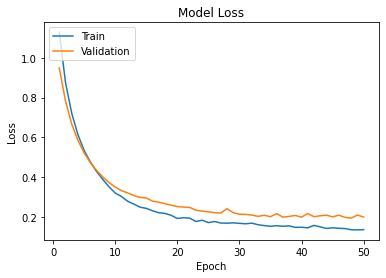

In [57]:
plotLearningCurve(history,50)